# Google Playstore Case Study

Required: googleplaystore.csv

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the **most promising apps**. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [296]:
#import the libraries
import pandas as pd
import numpy as np

In [297]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [298]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

In [299]:
inp0.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [300]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [301]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable which would influence our analysis
 - imputing values may skew our results significantly 
 - drop the records

In [302]:
#Drop the rows having null values in the Rating field
inp1 = inp0.dropna(axis=0)

#Check the shape of the dataframe
inp1.shape

(9360, 13)

In [303]:
inp1 = inp0[~inp0.Rating.isnull()]
inp1.shape

(9367, 13)

In [304]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [305]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [306]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [307]:
inp1.loc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [308]:
inp1[(inp1['Android Ver'].isnull() ) & (inp1.Rating == 19.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [309]:
#Drop the row having shifted values
inp1 = inp1[~((inp1['Android Ver'].isnull() ) & (inp1.Rating == 19.0))]

In [310]:
#Check the nulls again in Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [311]:
#Check the most common value in the Android version column
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [312]:
inp1['Android Ver'].value_counts().head()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
Name: Android Ver, dtype: int64

In [313]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna('4.1 and up')

In [314]:
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [315]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [316]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [317]:
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0]

'Varies with device'

In [318]:
inp1['Current Ver'].value_counts().head()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

In [319]:
#Replace the nulls in the Current version column with the above value

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [320]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].mode()[0]

'Varies with device'

In [321]:
inp1['Current Ver'].value_counts().head()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

Imputations are generally done when keeping the missing values disbars you from doing further analysis and eliminating the rows containing those values leads to some bias. 

The estimation is based on the mean, mode, median, etc. of the data.

In cases where there are numerical columns involved, both mean and median offer up as a good imputed value. In the case of the categorical column, mode turns out to be a decent enough imputation to carry out.

#### Handling Incorrect Data Types 

In [322]:
#Check the datatypes of all the columns 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Aggregations like average, sum or mean cannot be performed on character variables or strings. Only numeric datatypes like float or int would allow you to calculate those values. 

In [323]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp1[inp1["Android Ver"] == '4.1 and up']["Price"].mean()

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000 to numeric

In [324]:
#Analyse the Price column to check the issue
inp1["Price"].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [325]:
# Additonal ‘$’ sign for every paid app
#Write the function to make the changes

inp1["Price"] = inp1["Price"].apply(lambda x: 0 if x=="0"  else float(x[1:]))

In [326]:
#Verify the dtype of Price once again
inp1["Price"].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [327]:
#Analyse the Reviews column
inp1["Reviews"].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [328]:
#Change the dtype of this column
inp1["Reviews"] = inp1["Reviews"].apply(lambda x: int(x))

inp1["Reviews"] = inp1["Reviews"].astype('int32')

In [329]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [330]:
#Check the quantitative spread of this dataframe

inp1["Reviews"].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [331]:
#Analyse the Installs Column

inp1["Installs"].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [332]:
inp1["Installs"].apply(lambda x: x.replace('+', "")).apply(lambda x: x.replace(',', "")).value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [333]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

inp1["Installs"] = inp1["Installs"].apply(lambda x: x.replace('+', "")).apply(lambda x: x.replace(',', "")).astype('int32')

In [334]:
inp1["Installs"].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [335]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


In [336]:
inp1["Installs"].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [337]:
inp1["Installs"].mean()

17897443.726030324

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [338]:
# Perform the sanity checks on the Reviews column
# Rating is between 1 and 5 for all the apps.

inp1["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [339]:
# max is 5 and min is 1

In [340]:
#Perform the sanity checks on the Reviews column
inp1["Reviews"].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [341]:
# Number of Reviews is less than or equal to the number of Installs.

inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [342]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [343]:
inp1.shape

(9366, 13)

In [344]:
# drop them

inp1 = inp1[(inp1.Reviews <= inp1.Installs)]
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [345]:
inp1.shape

(9359, 13)

In [347]:
#perform the sanity checks on prices of free apps 

inp1[(inp1.Type=="Free") & inp1.Price >0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [348]:
inp1[(inp1.Type=="Free") & inp1.Price >0].describe()

,Rating,Reviews,Size,Installs,Price
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

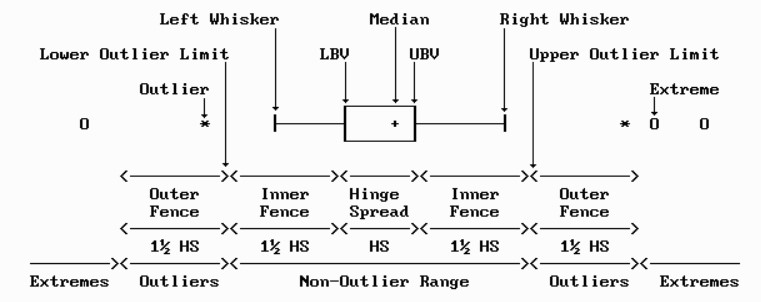

https://www.xycoon.com/nonoutlier_range.htm

**Hinge**

- Q1 : LOWER HINGE OR LEFT HINGE
- Q3 : UPPER HINGE OR RIGHT HINGE
- Q3-Q1 : IQR OR IQD OR HINGE SPREAD OR MIDSPREAD

**Inner fences OR Whiskers OR Extremes**

- Q1- 1.5(IQR): LOWER INNER FENCE OR LEFT INNER FENCE OR LOWER WHISKER OR LEFT WHISKER
- Q3+ 1.5(IQR): UPPER INNER FENCE OR RIGHT INNER FENCE OR UPPER WHISKER OR RIGHT WHISKER

**Outer fences**

- Q1- 3(IQR): LOWER OUTER FENCE OR LEFT OUTER FENCE 
- Q3+ 3(IQR): UPPER OUTER FENCE OR RIGHT OUTER FENCE

**Outliers**
- Data points within outer fences

**Extremes**
- Data points below left outer fence or above the right outer fences

In [356]:
#import the plotting libraries

import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
inp1["Price"].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

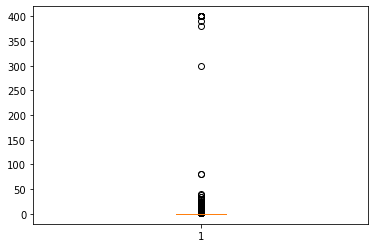

In [358]:
#Create a box plot for the price column
plt.boxplot(inp1["Price"])
plt.show()

In [360]:
#Check the apps with price more than 200
inp1[(inp1["Price"] >200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [ ]:
# all the apps are "I'm rich", these are suspicious -> junk apps

In [361]:
# Clean the Price column
inp1 = inp1[inp1.Price <200]

In [362]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

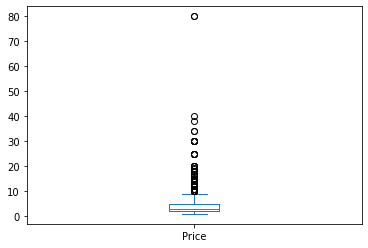

In [365]:
#Create a box plot for paid apps

inp1[inp1.Price>0].Price.plot.box()

<AxesSubplot:>

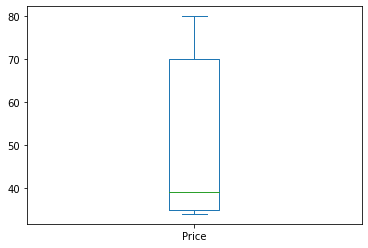

In [366]:
#Check the apps with price more than 30
inp1[inp1.Price>30].Price.plot.box()

In [368]:
#Check the apps with price less than 30
inp1[inp1.Price<30].shape

(9338, 13)

In [370]:
#Clean the Price column again
inp1 = inp1[inp1.Price<30]
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


You can adjust the number of bins to improve its granularity

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

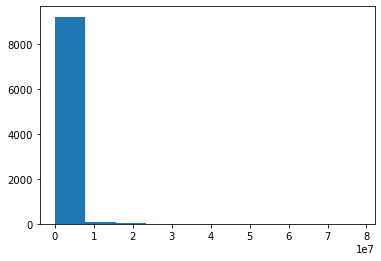

In [376]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)

plt.show()

In [ ]:
# extreme values of 0 and 1 

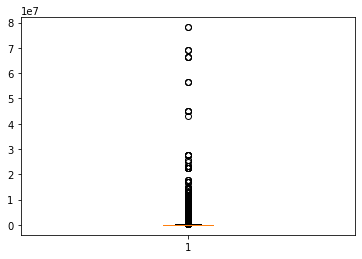

In [378]:
#Create a boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show()

In [379]:
inp1.Reviews.value_counts()

2         81
3         78
5         74
4         73
1         67
          ..
342912     1
4272       1
5517       1
4057       1
398307     1
Name: Reviews, Length: 5988, dtype: int64

In [386]:
#Check records with 10 million reviews
# uber successful apps
# apps won’t be useful for our analysis since they already have skewed statistics
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [387]:
#Drop the above records

inp1 = inp1[inp1.Reviews <= 10000000]
inp1.shape

(9246, 13)

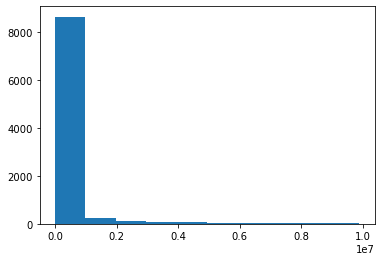

In [388]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)
plt.show()

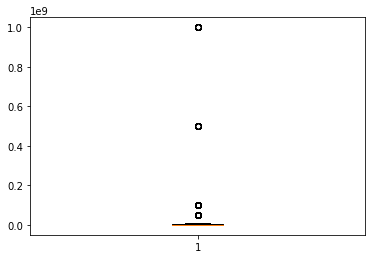

In [390]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
plt.show()

In [391]:
inp1.Installs.describe()

count    9.246000e+03
mean     1.303561e+07
std      6.865554e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [392]:
# IQR = Q3-Q1 = 5.000000e+06 - 1.000000e+04 = 9.9e+05

In [393]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(9177, 13)

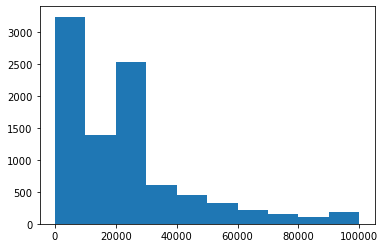

In [395]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()

In [398]:
# the first three peaks outweigh the rest of the bars, and hence you can say that a majority of apps have a size less than 30,000.

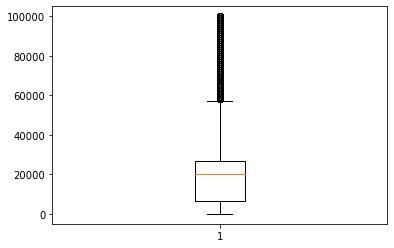

In [399]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [400]:
#  the median value lies at around 18,000